# **Sentiment Analysis on IMDB Dataset**



This project performs sentiment analysis on the IMDB dataset using various machine learning models, such as Logistic Regression, Multinomial Naive Bayes, and Linear SVC. The steps include data exploration, preprocessing, model training, evaluation, and prediction.

## Import


The process begins by importing the necessary libraries for the task.

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import nltk

%matplotlib inline


## 1. Initial Data Exploration and Understanding

### Loading the Dataset
The IMDB dataset contains two columns: review and sentiment. The dataset will be loaded, and an initial inspection will be conducted to understand its structure.

In [75]:
df=pd.read_csv("IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Dataset Shape

In [76]:
print(df.shape)

(50000, 2)


### Checking the Data Types and Info
The dataset consists of 50,000 entries, each containing two columns: review and sentiment. Both columns are of the object data type. There are no missing values, as indicated by the Non-Null Count for both columns, showing that all entries are complete. The review column contains the text of the movie reviews, while the sentiment column stores the sentiment labels (either positive or negative) for each review. 

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


### Value Counts for Sentiment

This balanced distribution ensures that both positive and negative sentiments are well-represented for the analysis, which can help improve the performance of classification models.


In [80]:
df["sentiment"].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

## Sentiment Distribution

This script utilizes sns.countplot() from the Seaborn library to create a bar chart, which plots the count of entries for each sentiment category (positive and negative) within the dataset.




Text(0.5, 1.0, 'Sentiment distribution')

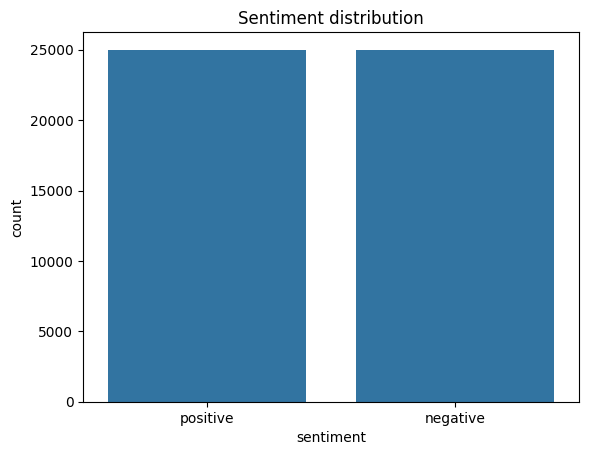

In [81]:
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment distribution")

## Word Count Distribution
Kernel Density Estimation (KDE) plot is created to illustrate the word count distribution for both positive and negative reviews.


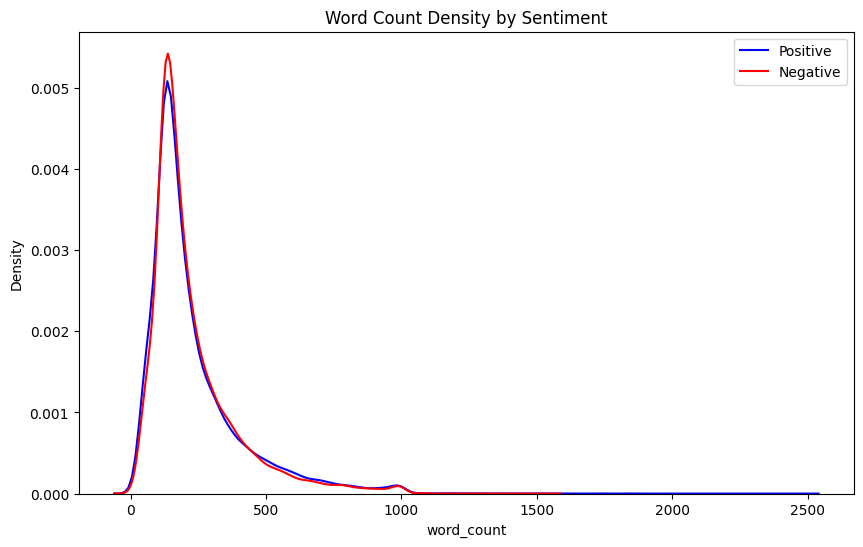

In [82]:
# Create and visualize word count
df['word_count'] = df['review'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['sentiment'] == 'positive'], x='word_count', label='Positive', color='blue', fill=False)
sns.kdeplot(data=df[df['sentiment'] == 'negative'], x='word_count', label='Negative', color='red', fill=False)
plt.title('Word Count Density by Sentiment')
plt.legend()
plt.show()

## Sentiment Label Encoding
The sentiment column is mapped to binary values, where positive reviews are encoded as 1 and negative reviews are encoded as 0. 


In [83]:
df.replace({"sentiment": {"positive": 1, "negative": 0}}, inplace=True)

In [84]:
df.head()

,review,sentiment,word_count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,0,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230


## Text Cleaning

A function is defined to clean the review text by removing unnecessary elements such as HTML tags, special characters, and stopwords. 

In [88]:
def clean_text(text):
    text = re.sub(r'<br /><br />', ' ', text)
    text = re.sub(r'<[^>]+>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

In [89]:
df.review = df['review'].apply(clean_text)

### Checking for Duplicate Entries


In [90]:
duplicated_count = df.duplicated().sum()
print("Number of duplicate entries: ", duplicated_count)

Number of duplicate entries:  421


### Removing duplicate reviews

In [91]:

df = df.drop_duplicates('review')

Visualize the distribution of positive and negative reviews in the dataset.

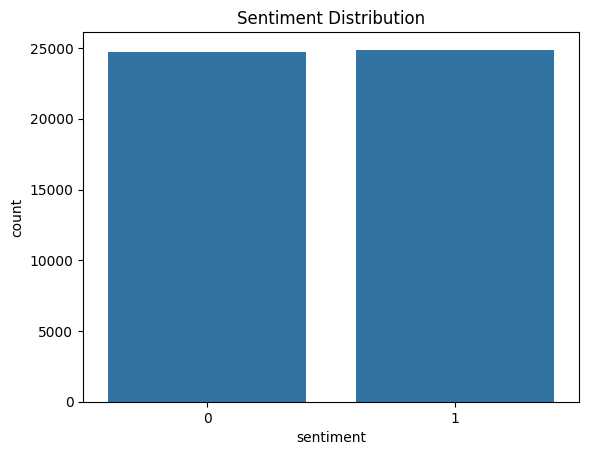

In [92]:
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()


## Stemmer

Used the PorterStemmer to perform stemming on the review text. This process reduces words to their root form, simplifying the vocabulary and making the model more effective.


In [93]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [94]:
df.review = df['review'].apply(lambda x: stemming(x))

In [95]:
df.head()

,review,sentiment,word_count
0,one reviewers mentioned watching oz episode yo...,1,307
1,wonderful little production filming technique ...,1,162
2,thought wonderful way spend time hot summer we...,1,166
3,basically theres family little boy jake thinks...,0,138
4,petter matteis love time money visually stunni...,1,230


## Positive Sentiment Word Cloud


In [96]:
pos_reviews =  df[df.sentiment == 1]
pos_reviews.head()

,review,sentiment,word_count
0,one reviewers mentioned watching oz episode yo...,1,307
1,wonderful little production filming technique ...,1,162
2,thought wonderful way spend time hot summer we...,1,166
4,petter matteis love time money visually stunni...,1,230
5,probably alltime favorite movie story selfless...,1,119


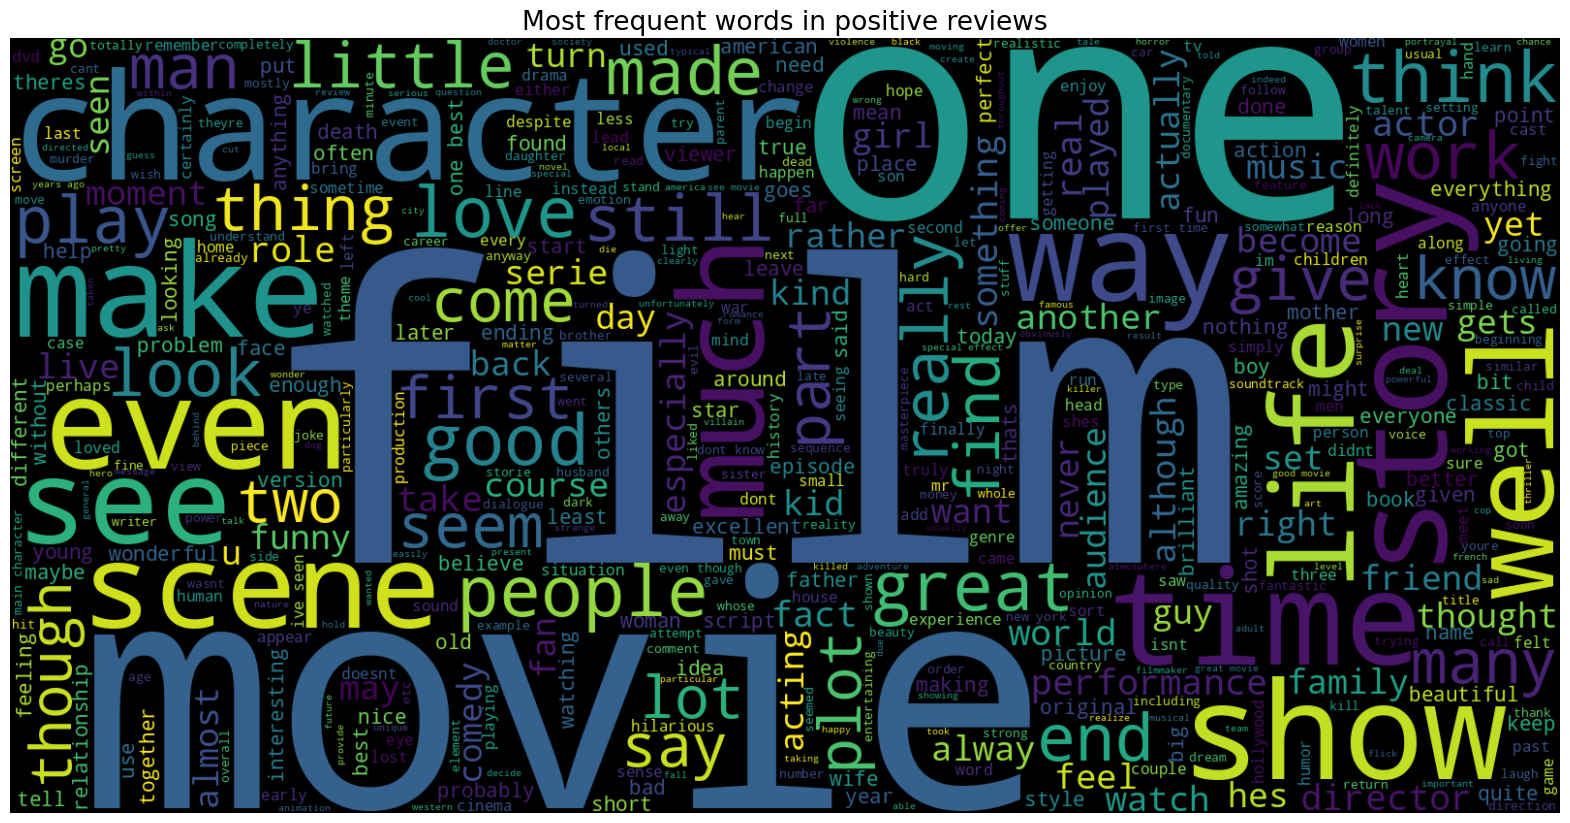

In [97]:
text = ' '.join([word for word in pos_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive reviews', fontsize = 19)
plt.show()

In [98]:
from collections import Counter
count = Counter()
for text in pos_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('film', 40027),
 ('movie', 36516),
 ('one', 26183),
 ('like', 17122),
 ('good', 14508),
 ('great', 12736),
 ('story', 12576),
 ('time', 12082),
 ('see', 11935),
 ('well', 11364),
 ('also', 10696),
 ('really', 10684),
 ('would', 10335),
 ('even', 9440),
 ('much', 9071)]

In [99]:
pos_words = pd.DataFrame(count.most_common(15))
pos_words.columns = ['word', 'count']
pos_words.head()

,word,count
0,film,40027
1,movie,36516
2,one,26183
3,like,17122
4,good,14508


## Negative Sentiment Word Cloud


In [100]:
neg_reviews =  df[df.sentiment == 0]
neg_reviews.head()

,review,sentiment,word_count
3,basically theres family little boy jake thinks...,0,138
7,show amazing fresh innovative idea first aired...,0,174
8,encouraged positive comments film looking forw...,0,130
10,phil alien one quirky films humour based aroun...,0,96
11,saw movie came recall scariest scene big bird ...,0,180


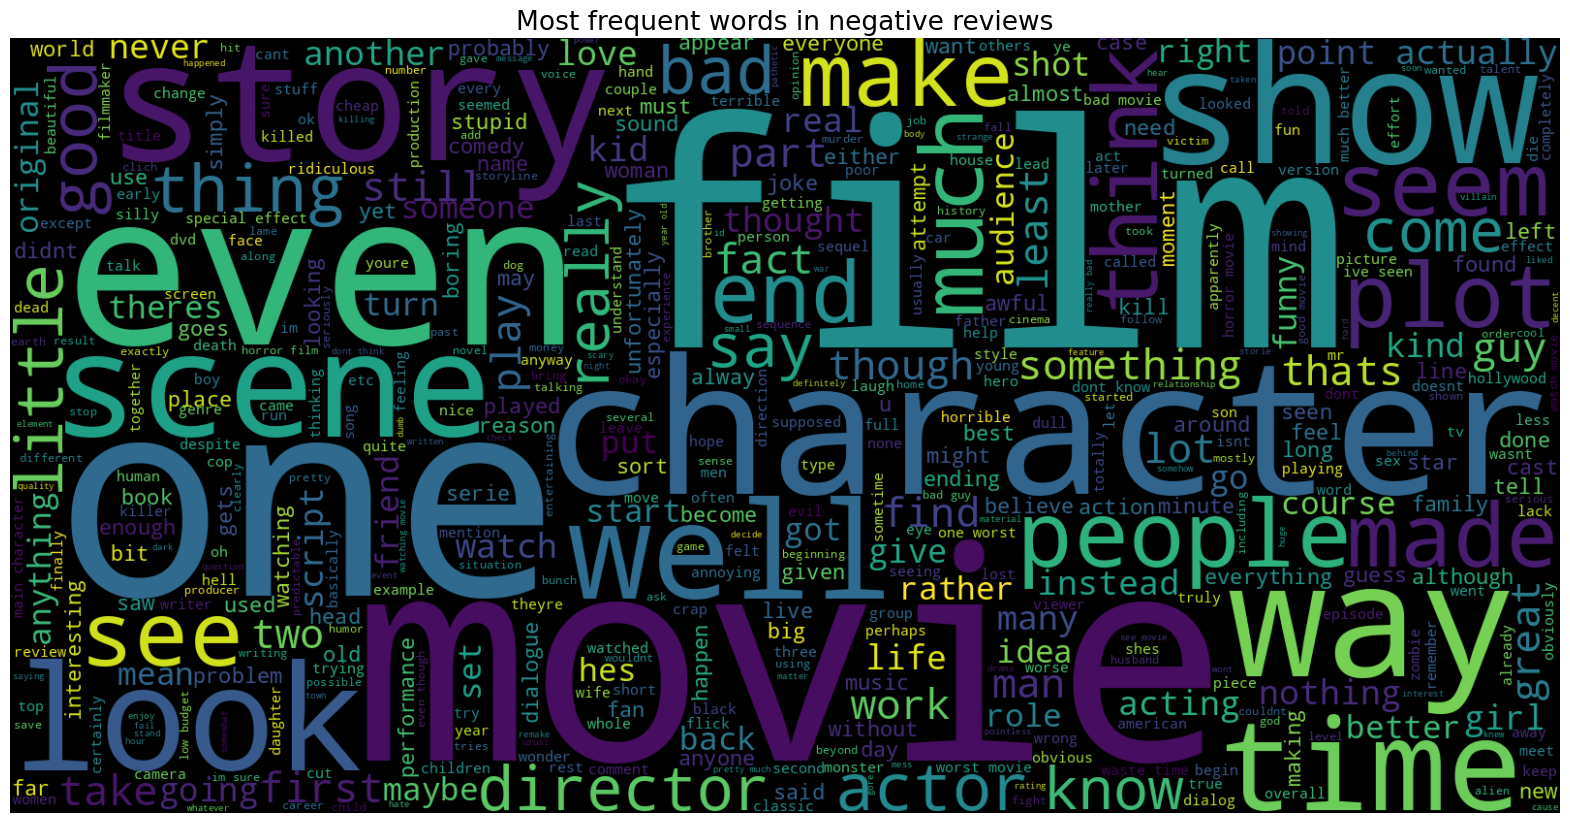

In [101]:
text = ' '.join([word for word in neg_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative reviews', fontsize = 19)
plt.show()

In [104]:
count = Counter()
for text in neg_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('movie', 48030),
 ('film', 35472),
 ('one', 24904),
 ('like', 21621),
 ('even', 14938),
 ('bad', 14210),
 ('good', 14193),
 ('would', 13502),
 ('really', 12156),
 ('time', 11692),
 ('see', 10499),
 ('dont', 10161),
 ('get', 9920),
 ('much', 9872),
 ('story', 9797)]

In [105]:
neg_words = pd.DataFrame(count.most_common(15))
neg_words.columns = ['word', 'count']
neg_words.head()

,word,count
0,movie,48030
1,film,35472
2,one,24904
3,like,21621
4,even,14938


In [106]:
X = df['review']
y = df['sentiment']


## Feature Extraction using TF-IDF
The TfidfVectorizer is instantiated and applied to the review text data. The transformed data is stored in the matrix X, where each entry represents the TF-IDF score of a term in a document.

In [107]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['review'])

## Splitting the Dataset
The dataset is split into training and testing sets using a 70-30 split.

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [109]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)


(34702, 162122)
(14873, 162122)
(14873,)
(34702,)


In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Model 1: Logistic Regression

The model achieved a test accuracy of 89.52%. This indicates that the Logistic Regression model is effective in classifying sentiments in the IMDB dataset, demonstrating a strong performance in distinguishing between positive and negative reviews.

In [111]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 89.52%


The model exhibits balanced performance with high accuracy, precision, and recall for both sentiment classes.








In [112]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[6544  863]
 [ 696 6770]]


              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7407
           1       0.89      0.91      0.90      7466

    accuracy                           0.90     14873
   macro avg       0.90      0.90      0.90     14873
weighted avg       0.90      0.90      0.90     14873



## Model 2: Multinomial Naive Bayes


The Multinomial Naive Bayes model achieved an accuracy of 86.57%. This indicates that the model performs well but slightly lower than the Logistic Regression model, which achieved 90% accuracy.








In [113]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
mnb_pred = mnb.predict(X_test)
mnb_acc = accuracy_score(mnb_pred, y_test)
print("Test accuracy: {:.2f}%".format(mnb_acc*100))

Test accuracy: 86.57%


In [114]:
print(confusion_matrix(y_test, mnb_pred))
print("\n")
print(classification_report(y_test, mnb_pred))

[[6497  910]
 [1087 6379]]


              precision    recall  f1-score   support

           0       0.86      0.88      0.87      7407
           1       0.88      0.85      0.86      7466

    accuracy                           0.87     14873
   macro avg       0.87      0.87      0.87     14873
weighted avg       0.87      0.87      0.87     14873



## Model 3: Linear SVC


The Linear Support Vector Classifier (SVC) achieved an accuracy of 89.50%. This model exhibits strong performance, with high precision and recall across both sentiment classes, indicating effective classification of both positive and negative reviews. 

In [115]:
svc = LinearSVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("Test accuracy: {:.2f}%".format(svc_acc*100))

/Users/apekshagyawali/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Test accuracy: 89.50%


In [116]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[6591  816]
 [ 745 6721]]


              precision    recall  f1-score   support

           0       0.90      0.89      0.89      7407
           1       0.89      0.90      0.90      7466

    accuracy                           0.90     14873
   macro avg       0.90      0.90      0.90     14873
weighted avg       0.90      0.90      0.90     14873



## Sentiment Prediction Function
The predict_sentiment function is designed to predict the sentiment of new reviews using a trained model. The trained model is used to predict the sentiment of this vector, and the function maps the prediction to a sentiment label, returning either "positive" or "negative."

In [117]:
def predict_sentiment(review,model, vectorizer):
    # Clean the review using the same preprocessing steps
    cleaned_review = clean_text(review)
    
    # Transform the cleaned review using the TF-IDF vectorizer
    review_vector = vectorizer.transform([cleaned_review])
    
    # Predict the sentiment using the trained model
    prediction = model.predict(review_vector)
    
    # Map the prediction to the sentiment label
    sentiment = "positive" if prediction[0] == 1 else "negative"
    
    return sentiment


## Example Prediction


An example review is provided: "This movie was good". The predict_sentiment function is used to determine the sentiment of this review using the trained svc model and the vectorizer.

In [126]:
new_review = "This movie was  good"
sentiment = predict_sentiment(new_review, svc, vectorizer)
print(f"The sentiment of the review is: {sentiment}")


The sentiment of the review is: positive
